<center> <h1>📈 Linear Regression 📈 </h1> </center> 

<p> <center> This notebook is in <span style="color: green"> <b> Active </b> </span> state of development! </center> </p>  
<p> <center> Be sure to checkout my other notebooks for <span style="color: blue"> <b> knowledge, insight and laughter </b> </span>! 🧠💡😂</center> </p> 

<center> <img src="https://www.mihaileric.com/static/linear_regression_joke-9400ea8c70e0500f1934f7a22c86bc68-b75a8.png" width="550" height="550" /> </center> 

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# Aim

The aim is to provide, from scratch, code implementations for linear regression problems. This will involve both the main functions needed to solve a linear regression and some additional utility functions as well.

**Note**: We will not be diving into in-depth exploratory data analysis, feature engineering etc... in these notebooks and so will not be commenting extensively on things such as skewness, kurtosis, homoscedasticity etc...

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# Background

### 1.

For this topic, we consider a linear regression problem. The reason this is called 'linear' regression is not because it is in the form $y = mx + c$ but because the $\theta_{N}$ are linear combinations in $x$ i.e. $y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}$ is linear but $y = \theta_{0} + \theta_{1}x_{1}^{\theta_{2}}$ is not.

In general, the data we have will look like:

$$\{x_{1}^{i}, x_{2}^{i}, \dots, x_{p}^{i}, y^{i}\}_{i=1}^N$$

- $p$ = # of features in the dataset.
- $N$ = # of training inputs. 

Our linear regression problem will be of the form (non-vectorised):

$$
y = \underline{\boldsymbol{x}}^T\underline{\boldsymbol\theta} + \epsilon = f(\underline{\boldsymbol x}, \underline{\boldsymbol \theta}) ,\quad \epsilon \sim \mathcal N(0, \sigma^2)
$$

where $\underline{\boldsymbol x}\in\mathbb{R}^N$ are inputs and $y\in\mathbb{R}$ are noisy observations. The parameter vector $\underline{\boldsymbol\theta}\in\mathbb{R}^D$ parametrizes the function i.e. this is what we are trying to estimate.

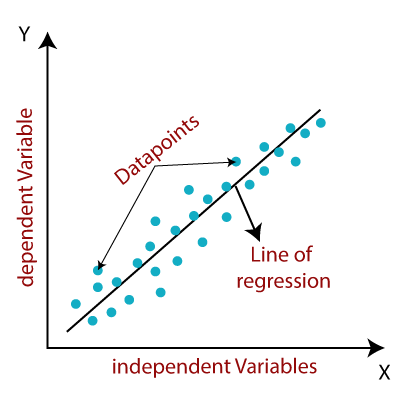

### 2.

For every data point $x^{i}$, we will have a corresponding *observation value*. Conventionally, we write the following:

\begin{gather}
    \underline{\boldsymbol y} = 
\begin{bmatrix}
  y^1 \\ y^2 \\ \dots \\ y^N 
\end{bmatrix}
=
\begin{bmatrix}
f(\boldsymbol x^{1}, \underline{\boldsymbol \theta}) \\ f(\boldsymbol x^{2}, \underline{\boldsymbol \theta}) \\ \dots \\ f(\boldsymbol x^{N}, \underline{\boldsymbol \theta})
\end{bmatrix}
\in \mathbb{R}^N
\qquad \text{the outcome/target variable}
\end{gather}

where,

\begin{gather}
    \underline{\boldsymbol x^{i}} = 
\begin{bmatrix} 
x^{i}_{1} \\ x^{i}_{2} \\ \dots \\ x^{i}_{p}
\end{bmatrix}
\in \mathbb{R}^p;\ \forall i \in {1,...,N}
\qquad \text{a feature of the dataset}
\end{gather}

Since our aim is to construct a linear regression of $\boldsymbol{y}$, we can write the observed datapoints as:

$$y^{i} = f_{LR}(\boldsymbol x^{i}, \underline{\boldsymbol{\theta}})= \theta_{0} + \theta_{1}x_{1}^{i} \dots \theta_{p}x_{p}^{i}; \ \forall i= 1,...,N$$

**Note:** Python treats row vectors and column vectors the same in computation/dimensions (as they are $1D$ arrays). Hence, this notation is abitrary as we can easily just transpose the column vector and make it into a row vector and rewrite the definition of $\boldsymbol x^{i}$ i.e. it is by choice how you lay this out but you must make sure to stay consistent in terms of dimension compatibility. 

Here, the only unknowns are the $\underline{\boldsymbol{\theta}}$. Hence, our goal is to estimate $\underline{\boldsymbol{\theta}}$ i.e. calculate the estimates $\underline{\boldsymbol{\hat \theta}}$, which we call our **parameters** of the dataset. 

### 3.

For every data point, we will also have a *predicted value*. Similarly, we write the following:

\begin{gather}
    \underline{\hat{\boldsymbol y}} = 
\begin{bmatrix}
  \hat y^1 \\ \hat y^2 \\ \dots \\ \hat y^N 
\end{bmatrix}
=
\begin{bmatrix}
f(\boldsymbol x^{1}, \underline{\boldsymbol{\hat \theta}}) \\ f(\boldsymbol x^{2}, \underline{\boldsymbol{\hat \theta}}) \\ \dots \\ f(\boldsymbol x^{N}, \underline{\boldsymbol{\hat \theta}})
\end{bmatrix}
\in \mathbb{R}^N
\qquad \text{the predicted datapoints of $\boldsymbol{y}$}
\end{gather}

Since our aim is to construct a linear regression of $\boldsymbol{y}$, we can write the predicted datapoints as:

$$\hat y^{i} = f_{LR}(\boldsymbol x^{i}, \underline{\boldsymbol{\hat\theta}})= \hat \theta_{0} + \hat \theta_{1}x_{1}^{i} \dots \hat \theta_{p}x_{p}^{i}; \ \forall i= 1,...,N$$

### 4.

Combining all the previous notations, we will write the associated model in the following matrix/vectorised manner:
    
\begin{gather}
    \underline{\boldsymbol{y}}
    = Y =
\begin{bmatrix}
y^{1} \\ \ y^{2} \\ \dots \\  y^{N}
\end{bmatrix}
=
\begin{bmatrix}
f(\boldsymbol x^{1}, \underline{\boldsymbol{ \theta}}) \\ f(\boldsymbol x^{2}, \underline{\boldsymbol{\theta}}) \\ \dots \\ f(\boldsymbol x^{N}, \underline{\boldsymbol{ \theta}})
\end{bmatrix}
=
\begin{bmatrix}
\theta_{0} + \theta_{1}x_{1}^{1} \dots \theta_{p}x_{p}^{1} \\
\theta_{0} + \theta_{1}x_{1}^{2} \dots \theta_{p}x_{p}^{2} \\ \dots \\
\theta_{0} + \theta_{1}x_{1}^{N} \dots \theta_{p}x_{p}^{N}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1}^{1} & x_{2}^{1} & \dots & x_{p}^{1} \\
1 & x_{1}^{2} & x_{2}^{2} & \dots & x_{p}^{2} \\
\dots  & \dots  & \dots  & \dots & \dots  \\
1 & x_{1}^{N} & x_{2}^{N} & \dots & x_{p}^{N} 
\end{bmatrix}
\begin{bmatrix}
\theta_0 \\  \theta_1 \\ \dots \\  \theta_p
\end{bmatrix}
= X \underline{\boldsymbol{ \theta}} 
\end{gather}

where:
- $\boldsymbol{X} \in \mathbb{R}^{N \times (p+1)}$
- $\underline{\boldsymbol{ \theta}} \in \mathbb{R}^{p+1}$
- $\underline{\boldsymbol{ y}} \in \mathbb{R}^{N}$

**Implementation Note:** We store each example as a row in the the $X$ matrix. To take into account the intercept term ($\hat \theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\hat \theta_0$ as simply another 'feature'.

### 5.

Mathematically speaking, our estimated parameters $\hat \theta_{j}$ are learned/observed after the modelling. 

Overall, the process is as follows: 
- We will first be working with the data $\underline{\boldsymbol{y}}={X\underline{\theta}}$
- Once we solve this matrix multiplication problem, we will have calculated $\underline{\boldsymbol{\hat \theta}} = \{\hat \theta_{j}; \forall j \in \{1,\dots,p\}\}$ 
- We can then substitute all $\hat \theta_{j}'s$ back into $\underline{\boldsymbol{y}}={X\underline{\theta}}$  to give us $\underline{\boldsymbol{\hat y}} = {X\underline{\hat \theta}}$

We can measure the quality of our $\underline{\boldsymbol{\hat \theta}}$ parameters by minimising the total residual error i.e. sum of the difference between predictions and observations, which is $\underline{\boldsymbol{y}}-\underline{\boldsymbol{\hat y}} := \underline{\boldsymbol{e}} $. (This will later be constructed into a cost function that we will record). 

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## Import Modules

In [1]:
# Importing standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Data Collection

In [2]:
# Import training and test set 
df_train = pd.read_csv('../input/random-linear-regression/train.csv')
df_test = pd.read_csv('../input/random-linear-regression/test.csv')

# Data Processing

In [3]:
# Join train and test set into one dataframe 
df = pd.concat((df_train, df_test), axis=0).reset_index(drop=True)

In [4]:
# Check for Nulls and dtype of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       999 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
# Check for NaNs
df.isna().sum()

x    0
y    1
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

**Note:** Make sure that you do not remove lots of datapoints due to the NaN or missing value issues. It may be better to impute them.

In [7]:
# Drop NaNs and duplicates
df = df.dropna().drop_duplicates()

In [8]:
# Overall statistics
df.describe()

,x,y
count,999.000000,999.000000
mean,50.291291,50.319804
std,28.808925,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,74.500000,74.475252
max,100.000000,108.871618


# Data Visualisations

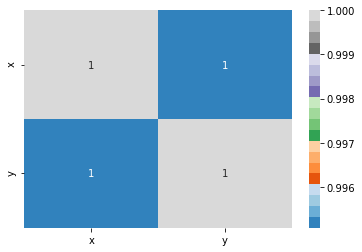

In [9]:
# Check for correlation
sns.heatmap(df.corr(), annot = True, cmap="tab20c");

A value of 1 (positive) suggests to us that there is an exact correlative match between the feature and the target variable and so a linear regression is a perfect fit for this dataset.

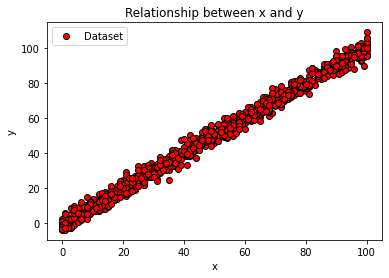

In [10]:
# Plot data
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relationship between x and y')
plt.plot(df.iloc[:,0],df.iloc[:,1],'ro', mec= 'k');
plt.legend(['Dataset']);

## Splitting dataset

For most machine learning models, we would like them to have low bias and low variance - that is, the model should perform well on the training set (low bias) and also the test set, alongside with other new random test sets (low variance). Therefore, to test for bias and variance of our model, we shall split the dataset into training and test set. We will not be tuning any hyperparameters (and thus do not need a validation set). 

For these functions, the $X$ dataset (of features) should have a column 1's as the first column to account for the bias term/intercept co-efficient. Before this occurs, one should check the order of magnitude of the features - if they differ hugely, one must apply feature scaling before calculating the MSE (this is not needed to run the normal equations however), so that our data is somewhat normally distributed.

In [11]:
# Separate features and target variable
X = df.iloc[:,:-1]
y = df.iloc[:,1]

In [12]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42)
# Re-index
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True) 
X_test = X_test.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [13]:
# Add ones to the dataframes
m,n = X_train.values.shape
o,p = X_test.values.shape
X_train = pd.concat((pd.DataFrame(np.ones((m, 1)), columns= ['Bias']),X_train),axis=1)
X_test = pd.concat((pd.DataFrame(np.ones((o, 1)), columns= ['Bias']),X_test),axis=1)

# Cost Function

The least squares finds a solution that minimises the mean squred error of our linear regression model. This happens to also be equivalently known as the Linear Regression Cost Function. 
    
<br>
The cost function, is defined as (in non-matrix vector form):

$$ MSE_{Linear} = J({\boldsymbol \theta}) = \frac{1}{N} \sum_{i=1}^N \left( \hat y - y^{(i)}\right)^2$$

This can also be written as (in matrix vector form):

$$ MSE_{Linear} = J({\boldsymbol \theta}) = \frac{1}{m}[(y - X {\boldsymbol \theta})^T (y - X {\boldsymbol \theta})]$$

Thus, we seek:

$$
\underline{\boldsymbol{\hat \theta}} = \{\underline{\boldsymbol \theta} : 
\underset{\underline{\boldsymbol\theta}}{\text{min}}\ {J(\theta)}\}
$$

In [14]:
def LR_Cost(X: pd.DataFrame, y: pd.Series, theta: np.array) -> float:

    """ Return the Mean Squared Error of a linear regression model using vectorised notation. """

    # Retrieve feature dimensions
    m, n = X.shape 
    # Calculate error 
    residual = y - X @ theta
    # Calculate Cost Function 
    CF_LR = (1/m) * (residual.T @ residual)
    # Return Cost Function
    return CF_LR

# Theta/Co-efficient Estimates

Finding the least squares solution to the linear cost function/MSE can be done via multivariable differentiation techniques. Instead, we will look at the equivalent form; that is, using maximum likelihood estimation, we find the parameters $\boldsymbol\theta^{\mathrm{ML}}$ that maximises the likelihood of our linear regression model:
    
$$
p(\mathcal Y | \mathcal X, \boldsymbol\theta) = \prod_{n=1}^N p(y_n | \boldsymbol x_n, \boldsymbol{{\theta}})\,
$$
We know that the maximum likelihood estimator is given by:
    
$$
\boldsymbol{\theta}^{\text{ML}} = (\boldsymbol X^T\boldsymbol X)^{-1}\boldsymbol X^T\boldsymbol y \, 
$$
<br>
which yields us the same answers as the derivation from differentiation of the matrix vector MSE form. 

In [15]:
def LS_NE(X: pd.DataFrame, y: pd.Series) -> np.array:
    
    """ Return the maximum likelihood estimate from the normal equations as this maximises the likelihood of the linear regression model. """

    # Calculate estimator theta
    return np.linalg.solve((X.T @ X), X.T @ y)

# Regression Predictions

In [16]:
def predict(X: pd.DataFrame, theta_estimate: np.array) -> pd.Series:
    
    """ Return model predictions. """

    return X @ theta_estimate

# Full Linear Regression Model

In [17]:
class LinearRegression():
    
    def __init__(self):
        
        """ Initialise parameters. """
        
        self.theta = None
    
    def fit(self, X: pd.DataFrame, y: pd.Series) -> np.array:
    
        """ Return the maximum likelihood estimate from the normal equations as this maximises the likelihood of the linear regression model. """

        # Calculate estimator theta
        self.theta = np.linalg.solve((X.T @ X), X.T @ y)

    def predict(self, X: pd.DataFrame) -> pd.Series:
    
        """ Return model predictions. """

        y_pred = X @ self.theta
        # Return predictions
        return y_pred
    
    def LR_Cost(self, X: pd.DataFrame, y: pd.Series) -> float:

        """ Return the Mean Squared Error of a linear regression model using vectorised notation. """

        # Retrieve feature dimensions
        m, n = X.shape 
        # Calculate error 
        residual = y - X @ self.theta
        # Calculate Cost Function 
        CF_LR = (1/m) * (residual.T @ residual)
        # Return Cost Function
        return CF_LR

# Model Testing and Results

In [18]:
# Instantiate model
pop_prof_model = LinearRegression()

In [19]:
# Fit model to training dataset to obtain estimates
pop_prof_model.fit(X_train, y_train)
# Obtain predictions for training and test dataset
y_pred_train = pop_prof_model.predict(X_train)
y_pred_test = pop_prof_model.predict(X_test)
# Calculate MSE and R2 score on training and test dataset
MSE_train = pop_prof_model.LR_Cost(X_train, y_train)
MSE_test = pop_prof_model.LR_Cost(X_test, y_test)
print("Theta estimates are: {}".format(pop_prof_model.theta))
print("Training dataset mean squared error: {}".format(MSE_train))
print("Test dataset mean squared error: {}".format(MSE_test))
print("Train dataset R2 score: {}".format(r2_score(y_train,y_pred_train)))
print("Test dataset R2 score: {}".format(r2_score(y_test,y_pred_test)))

Theta estimates are: [-0.29654476  1.00523472]
Training dataset mean squared error: 8.088375976934048
Test dataset mean squared error: 9.003332816736535
Train dataset R2 score: 0.9904790394652241
Test dataset R2 score: 0.9891879937675698


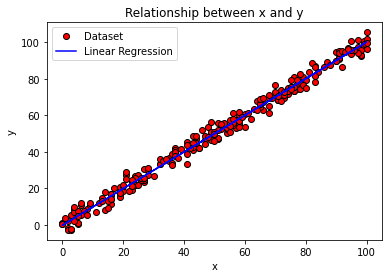

In [20]:
# Plot test data against predictive model
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relationship between x and y')
plt.plot(X_test.iloc[:,1],y_test,'ro', mec= 'k');
plt.plot(X_test.iloc[:,1],y_pred_test,'-b', mec= 'k');
plt.legend(['Dataset', 'Linear Regression']);

# Summary

- The in-sample MSE (training) and out-sample MSE (test) are quite small in value and very close. 
- The out-sample is slightly higher than the in-sample, which may suggest a higher bias of the model as it is has trained/more suited to the training dataset.
- The R2 score is extremely high (near 1) for both training and test set which means that the model nearly explains all the variation in the response variable around its mean.

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

# Extra

To apply feature scaling on the feature dataset:

In [21]:
def feature_scaling(X: pd.DataFrame) -> pd.DataFrame:
    
    """ Normalises the features in X (dataframe) and returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1. """
    
    # Return normalised data
    return (X - np.mean(X, axis=0))/np.std(X, axis=0, ddof=0)

An alternative cost function implementation (that uses a for loop):

In [22]:
def LR_Cost_Alt(X: pd.DataFrame, y: pd.Series, theta: np.array) -> float:
    
    """ Return the Mean Squared Error of a linear regression model using loops. """
    
    # Retrieve feature dimensions
    m, n = X.shape 
    # Initialise error
    residual = 0
    # Calculate squared error 
    for i in range(m):
        residual += (y[i] - np.sum(X[:,i] * theta))**2
    # Calculate mean squared error
    CF_LR = np.mean(residual)
    # Return Cost Function
    return CF_LR

To plot datasets that are 2-dimensional, where the first column is the $x$ variable and the second column is the $y$ variable:

In [23]:
def plot_data(data: pd.DataFrame):
    
    """ Plot 2-D dataset. """
    
    # Split data into X inputs and y outcomes (from dataframe)
    X = data.iloc[:,0]
    y = data.iloc[:,1]
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title('Investigating the relationship between ...')
    plt.plot(X,y,'ro', mec= 'k')

Some comments about the code implementations:

1. Here we have created an entire python class for linear regression to make it similar to a machine learning pipeline format. If you would like to just use the functions by themselves, simply take them from the individual sections.
2. We have only dealt with 1 feature in this dataset (simple linear regression) - a mult-linear regression may not yield the same accuracy. 
3. We have not actually used the cost function as a means to optimise the model - we have simply used the normal equations to obtain our estimates. The cost function is used as a metric as it is equivalent to the MSE. 
3. Two alternative methods to solve linear regression problems are: Gradient Descent (Batch) which uses the cost function as an objective function and Grid Search (Brute Force). Seperate notebooks will be designated to each of these methods and you will see that all these methods will provide the exact/near same solutions. 

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

Thanks for reading this notebook. If there are any mistakes or things that need more clarity, feel free to respond in the comment section and I will be happy to reply. 

As always, please leave an upvote - it would also be helpful if you cite this documentation if you are going to use any of the code. 😊

#CodeWithSid 